# Import Libraries

In [8]:
# Week 9 — Cell 1: Importing Libraries (Principal Component Analysis)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Load Dataset

In [9]:
# Week 9 — Cell 2: Load Wine dataset

# Load Wine dataset from sklearn
wine = load_wine()

# Create DataFrame for features
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Target labels (wine classes)
y = pd.Series(wine.target, name="Class")

print("Wine dataset loaded successfully!")
print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)

print("\nFirst 5 rows of features:")
display(X.head())

print("\nTarget classes:", np.unique(y))


Wine dataset loaded successfully!

Feature shape: (178, 13)
Target shape: (178,)

First 5 rows of features:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Target classes: [0 1 2]


# Standardize Features

In [10]:
# Week 9 — Cell 3: Standardize features

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Feature standardization completed!")
print("Scaled data shape:", X_scaled.shape)


Feature standardization completed!
Scaled data shape: (178, 13)


# Apply PCA and analysis variance

In [11]:
# Week 9 — Cell 4: Apply PCA (full components)

# Apply PCA keeping all components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_

print("Explained variance ratio for each principal component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

print("\nTotal variance explained by all components:",
      explained_variance.sum())


Explained variance ratio for each principal component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080

Total variance explained by all components: 1.0


# Plot explained Variance

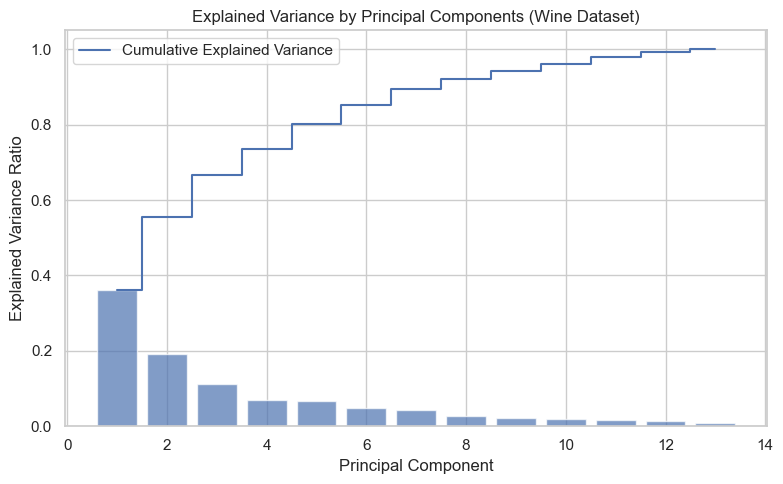

In [12]:
# Week 9 — Cell 5: Plot explained variance ratio

plt.figure(figsize=(8,5))

plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    alpha=0.7
)

plt.step(
    range(1, len(explained_variance) + 1),
    np.cumsum(explained_variance),
    where='mid',
    label='Cumulative Explained Variance'
)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components (Wine Dataset)")
plt.legend()
plt.tight_layout()
plt.show()


# PCA with 2 components plus 2D Visualization

Explained variance by 2 components: [0.36198848 0.1920749 ]
Total variance explained (2 PCs): 0.5540633835693526


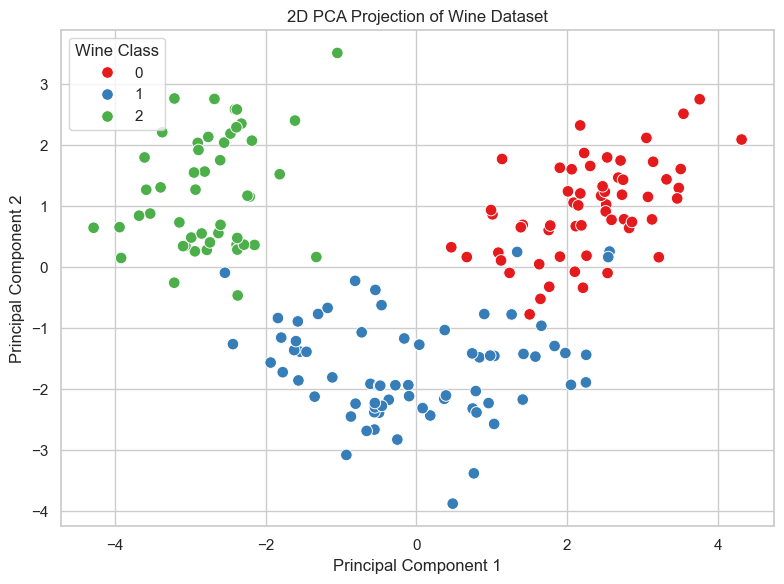

In [13]:
# Week 9 — Cell 6: PCA with 2 components and 2D visualization

# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Explained variance by 2 components:",
      pca_2d.explained_variance_ratio_)
print("Total variance explained (2 PCs):",
      pca_2d.explained_variance_ratio_.sum())

# Create DataFrame for plotting
pca_2d_df = pd.DataFrame(
    X_pca_2d,
    columns=['PC1', 'PC2']
)
pca_2d_df['Class'] = y

# 2D scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_2d_df,
    x='PC1',
    y='PC2',
    hue='Class',
    palette='Set1',
    s=70
)

plt.title("2D PCA Projection of Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Wine Class")
plt.tight_layout()
plt.show()


# PCA with 3 components + 3D plot

Explained variance by 3 components: [0.36198848 0.1920749  0.11123631]
Total variance explained (3 PCs): 0.6652996889318524


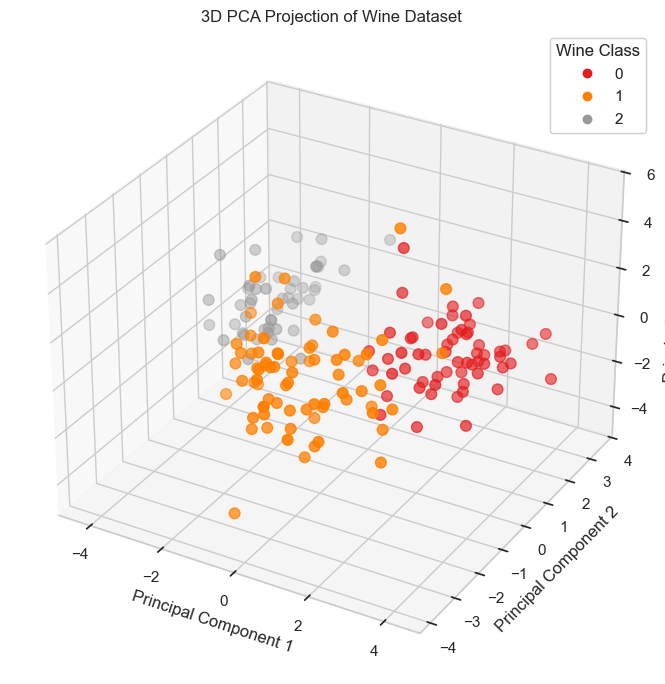

In [15]:
# Week 9 — Cell 7: PCA with 3 components and 3D visualization

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("Explained variance by 3 components:",
      pca_3d.explained_variance_ratio_)
print("Total variance explained (3 PCs):",
      pca_3d.explained_variance_ratio_.sum())

# Create DataFrame for plotting
pca_3d_df = pd.DataFrame(
    X_pca_3d,
    columns=['PC1', 'PC2', 'PC3']
)
pca_3d_df['Class'] = y

# 3D scatter plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_3d_df['PC1'],
    pca_3d_df['PC2'],
    pca_3d_df['PC3'],
    c=pca_3d_df['Class'],
    cmap='Set1',
    s=60
)

ax.set_title("3D PCA Projection of Wine Dataset")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

legend = ax.legend(*scatter.legend_elements(),
                   title="Wine Class")
ax.add_artist(legend)

plt.tight_layout()
plt.show()
